In [12]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt

In [13]:
image_path= 'D:/github/image caption/Flickr8k_Dataset/'
images=glob(image_path+ '*.jpg')
len(images)

8091

In [14]:
images[:5]

['D:/github/image caption/Flickr8k_Dataset\\1000268201_693b08cb0e.jpg',
 'D:/github/image caption/Flickr8k_Dataset\\1001773457_577c3a7d70.jpg',
 'D:/github/image caption/Flickr8k_Dataset\\1002674143_1b742ab4b8.jpg',
 'D:/github/image caption/Flickr8k_Dataset\\1003163366_44323f5815.jpg',
 'D:/github/image caption/Flickr8k_Dataset\\1007129816_e794419615.jpg']

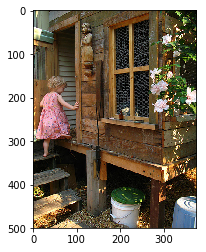

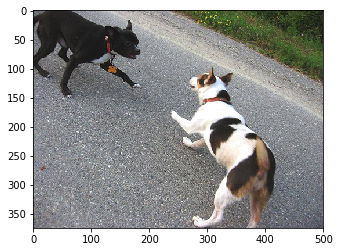

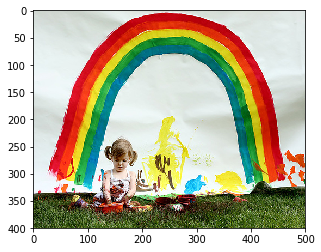

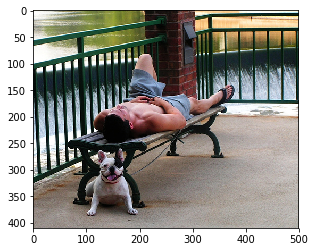

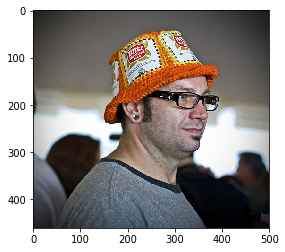

In [16]:
for i in range(5):
    plt.figure()
    img=cv2.imread(images[i])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [17]:
from keras.applications import ResNet50
modele= ResNet50(include_top=True)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 83s 1us/step


In [18]:
modele.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [23]:
from keras.models import Model
last=modele.layers[-2].output
modele=Model(input=modele.input,output=last)
modele.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

C:\Users\Golu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("av...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
images[0].split('\\')[1]

'1000268201_693b08cb0e.jpg'

In [31]:
image_feature={}
count=0
for i in images:
    img=cv2.imread(i)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224,224))
    img=img.reshape(1,224,224,3)
    
    pred=modele.predict(img).reshape(2048,)
    
    img_name=i.split('\\')[1]
    image_feature[img_name]=pred
    
    count+=1    
    if (count>1000):
        break
    elif(count%50==0):
        print(count)
    

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


In [39]:
caption_path='D:/github/image caption/Flickr8k_text/Flickr8k.token.txt'
captions=open(caption_path,'rb').read().decode('utf-8').split('\n')

In [40]:
captions

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [44]:
captions[0].split('\t')[1]

'A child in a pink dress is climbing up a set of stairs in an entry way .'

In [43]:
caption_dict={}
count=0
for i in captions:
    img_name=i.split('\t')[0][:-2]
    caption=i.split('\t')[-1]
    if (img_name in image_feature):
        if img_name not in caption_dict:
            caption_dict[img_name]=[caption]
        else:
            caption_dict[img_name].append(caption)
        